## Residencia + Gerador distribuído

- Considere um gerador distribuído (GD) renovável intermitente (fotovoltaico ou eólico) instalado na residencia.

- A potência ativa do GD ($ P_{t}^GD$) tem como principal objetivo atender a demanda da residência.
- Porem, parte de potência ativa do GD ($ P_{t}^V$) pode ser vendida ou entregue à rede de distribuição.

![Residencia](../Figuras/3.2.png)

- Assuma uma estrutura tarifaria ($ C_{t}^OS, \forall t = 1 \dots 24$) de três níveis para a compra de energia da rede de distribuição, em R$/kWh: 

|t | $ R\$/kWh$ |
|:----:|:----:|
|00:00h - 16:59h | 0.22419 |
|17:00h - 17:59h | 0.32629 |
|18:00h - 20:59h | 0.51792 |
|21:00h - 21:59h | 0.32629 |
|22:00h - 24:00h | 0.22419 |

- O valor da venda de energia de parte da potência ativa do GD é igual a zero?
- Qual é a potência ativa fornecida pela rede de distribuição $ P_{t}^S$ para cada instante de tempo?

## Formulação General

### Conjuntos
- $ T: \text{Conjunto de intervalos de tempo.}$

### Parâmetros

- $ P_{t}^{D} : \text{Demanda de potência ativa da residencia no intervalo t [kW].} $
- $ P_{t}^{GD} : \text{Geração distribuída da residencia no intervalo t [kW].} $
- $ c_{t} : \text{Custo pela compra de energia no intervalo t [R\$kWh].} $

### Variáveis de decisão

- $P_{t}^{S} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{V} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 

### Função objetivo 

- $ \mathrm{Min} \sum\limits_{t \in T} c_{t}  P_{t}^{S}$

### Restrições 

- $ P_{t}^{S} + P_{t}^{GD} - P_{t}^{V} = P_{t}^{D} \;\;\;\;\;\; ;\forall t \in T $
- $ P_{t}^{S} \geq 0 \;\;\;\;\;\; ;\forall t \in T $
- $ P_{t}^{V} \geq 0 \;\;\;\;\;\; ;\forall t \in T $



## Preparaçõ dos dados de entrada

### Conjuntos
- $ T: \text{Conjunto de intervalos de tempo.}$

In [140]:
tempo = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

### Parâmetros

- $ P_{t}^{D} : \text{Demanda de potência ativa da residencia no intervalo t [kW].} $
- $ P_{t}^{GD} : \text{Geração distribuída da residencia no intervalo t [kW].} $
- $ c_{t} : \text{Custo pela compra de energia no intervalo t [R\$kWh].} $

In [141]:
dem = {'1': 1.9317, '2': 1.609, '3': 1.4079, '4': 1.3281, '5': 1.3834, '6': 1.6413, '7': 1.9395, '8': 1.7383, '9': 1.8341, '10': 1.8354, '11': 1.9312, '12': 2.3645, '13': 2.2038, '14': 2.2997, '15': 2.1659, '16': 2.5046, '17': 2.749, '18': 4.0597, '19': 4.9924, '20': 5.4257, '21': 5.0491, '22': 4.4294, '23': 3.7692, '24': 2.7716}
GD = {'1': 0.0, '2': 0.0, '3': 0.0, '4': 0.0, '5': 0.0796, '6': 0.4565, '7': 1.0742, '8': 1.579, '9': 2.4343, '10': 2.7488, '11': 3.5092, '12': 3.8988, '13': 3.9734, '14': 3.7105, '15': 3.1671, '16': 2.7282, '17': 2.3926, '18': 2.1764, '19': 1.9083, '20': 1.4257, '21': 0.0034, '22': 0.0, '23': 0.0, '24': 0.0}
costs = {'1': 0.22419,'2': 0.22419,'3': 0.22419,'4': 0.22419,'5': 0.22419,'6': 0.22419,'7': 0.22419,'8': 0.22419,'9': 0.22419,'10': 0.22419,'11': 0.22419,'12': 0.22419,'13': 0.22419,'14': 0.22419,'15': 0.22419,'16': 0.22419,'17': 0.32629,'18': 0.51792,'19': 0.51792,'20': 0.51792,'21': 0.32629,'22': 0.22419,'23': 0.22419,'24': 0.22419}

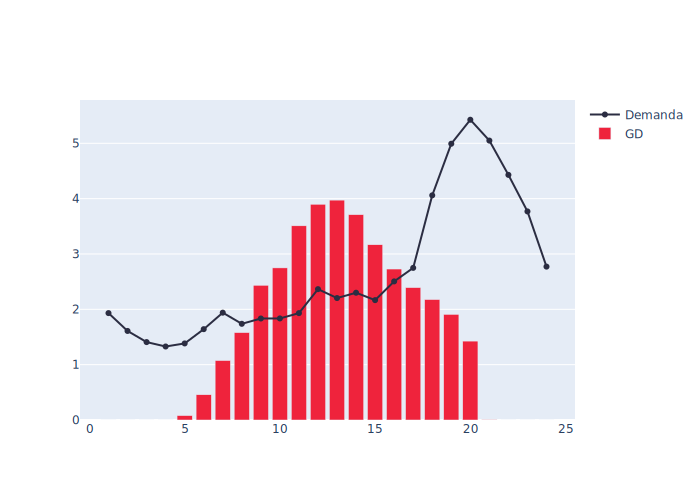

In [190]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(name='Demanda', x = tempo, y=list(dem.values()), mode="markers+lines", marker=dict(color='#2B2D42')))
fig.add_trace(go.Bar(name='GD', x = tempo, y=list(GD.values()), marker=dict(color='#EF233C')))
fig.update_layout(hovermode="x unified")
fig.show('svg')

## Modelo computacional PYOMO

In [168]:
from pyomo.environ import *
model = ConcreteModel("Residencia 02")

### Variáveis de decisão

- $P_{t}^{S} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 
- $P_{t}^{V} : \text{Potencia ativa fornecida pela rede de distribuição no intervalo t.}$ 

In [169]:
model.Ps = Var(tempo, within = PositiveReals)
model.Pv = Var(tempo, within = PositiveReals)

### Função objetivo 

- $ \mathrm{Min} \sum\limits_{t \in T} c_{t}  P_{t}^{S}$

In [170]:
model.cost = Objective(expr=sum(model.Ps[t] * costs[str(t)] for t in tempo), sense=minimize)

### Restrições 

- $ P_{t}^{S} + P_{t}^{GD} - P_{t}^{V} = P_{t}^{D} \;\;\;\;\;\; ;\forall t \in T $
- $ P_{t}^{S} \geq 0 \;\;\;\;\;\; ;\forall t \in T $
- $ P_{t}^{V} \geq 0 \;\;\;\;\;\; ;\forall t \in T $

In [172]:
model.constr = Constraint(tempo, rule=lambda model, t: model.Ps[t] + GD[str(t)] - model.Pv[t] == dem[str(t)])

### Solução

In [173]:
Resultado = SolverFactory('cbc', executable='C:/Solvers/cbc.exe').solve(model)

In [174]:
model.display()

Model Residencia 02

  Variables:
    Ps : Size=24, Index=Ps_index
        Key : Lower : Value  : Upper : Fixed : Stale : Domain
          1 :     0 : 1.9317 :  None : False : False : PositiveReals
          2 :     0 :  1.609 :  None : False : False : PositiveReals
          3 :     0 : 1.4079 :  None : False : False : PositiveReals
          4 :     0 : 1.3281 :  None : False : False : PositiveReals
          5 :     0 : 1.3038 :  None : False : False : PositiveReals
          6 :     0 : 1.1848 :  None : False : False : PositiveReals
          7 :     0 : 0.8653 :  None : False : False : PositiveReals
          8 :     0 : 0.1593 :  None : False : False : PositiveReals
          9 :     0 :    0.0 :  None : False : False : PositiveReals
         10 :     0 :    0.0 :  None : False : False : PositiveReals
         11 :     0 :    0.0 :  None : False : False : PositiveReals
         12 :     0 :    0.0 :  None : False : False : PositiveReals
         13 :     0 :    0.0 :  None : Fals

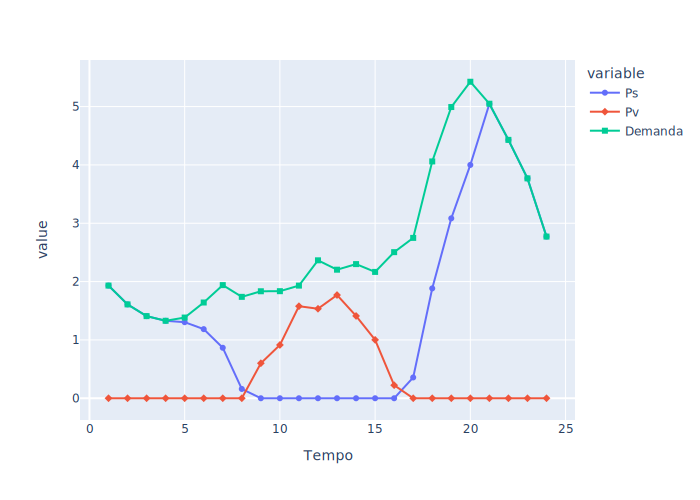

In [211]:
import plotly.express as px
import pandas as pd

df = pd.DataFrame({'Tempo': tempo, 'Ps': [model.Ps[t]() for t in tempo], 'Pv': [model.Pv[t]() for t in tempo], 'Demanda': [model.constr[t]() for t in tempo]})
fig = px.line(df, x='Tempo', y=['Ps', 'Pv', 'Demanda'], symbol = 'variable')
fig.show('svg')   